#Bonus Challenge (Extra Points)

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

In [97]:
# Load dataset
data = pd.read_csv("final_dataset_ready_group1.csv")

# Display basic information
print(data.head())
print(data.info())
print(data.describe())

   transaction_id  amount_spent purchase_date product_category  \
0          1001.0      1.044280    2024-01-01           Sports   
1          1002.0      0.498572    2024-01-02      Electronics   
2          1002.0      0.498572    2024-01-02      Electronics   
3          1002.0      0.498572    2024-01-02      Electronics   
4          1002.0      0.498572    2024-01-02      Electronics   

   customer_rating  transaction_count social_media_platform  engagement_score  \
0              2.3           0.967892              Facebook              70.0   
1              4.2           1.978213             Instagram              52.0   
2              4.2           1.978213                   NaN               NaN   
3              4.2           1.978213                   NaN               NaN   
4              4.2           1.978213              LinkedIn              86.0   

   purchase_interest_score review_sentiment  customer_engagement_score  \
0                      3.3         Negativ

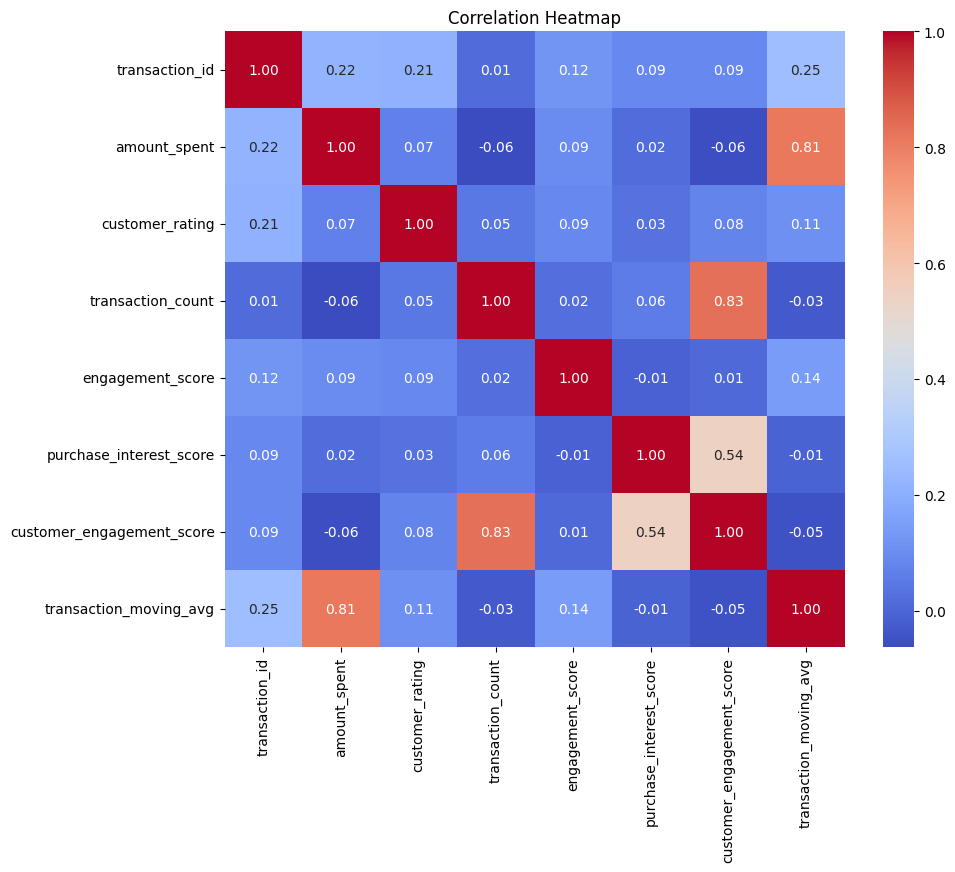

In [99]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['number'])

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [100]:
# Define features and target variable
features = [col for col in data.columns if col not in ['customer_id', 'amount_spent']]
X = data[features]
y = data['amount_spent']

In [102]:
# Identify numeric and non-numeric columns
numeric_cols = X.select_dtypes(include=['number']).columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Convert dates to a usable format or drop them
if 'date_column' in X.columns:  # Replace 'date_column' with actual date column name
    X['date_column'] = pd.to_datetime(X['date_column']).astype(int) / 10**9  # Convert to Unix timestamp

# Handle categorical variables (drop or encode)
X = X.drop(columns=non_numeric_cols, errors='ignore')  # Drop non-numeric columns

# Apply SimpleImputer to numeric columns only
imputer = SimpleImputer(strategy="mean")
X[numeric_cols] = imputer.fit_transform(X[numeric_cols])

# Verify cleaned dataset
print(X.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   transaction_id             370 non-null    float64
 1   customer_rating            370 non-null    float64
 2   transaction_count          370 non-null    float64
 3   engagement_score           370 non-null    float64
 4   purchase_interest_score    370 non-null    float64
 5   customer_engagement_score  370 non-null    float64
 6   transaction_moving_avg     370 non-null    float64
dtypes: float64(7)
memory usage: 20.4 KB
None


In [103]:
# Handle missing values
imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [104]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [106]:
# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

       Actual  Predicted
327  0.298478   0.310632
33   0.032986   0.235977
15  -0.407273  -0.435373
314 -0.694937   0.571142
57   0.051475   0.872177


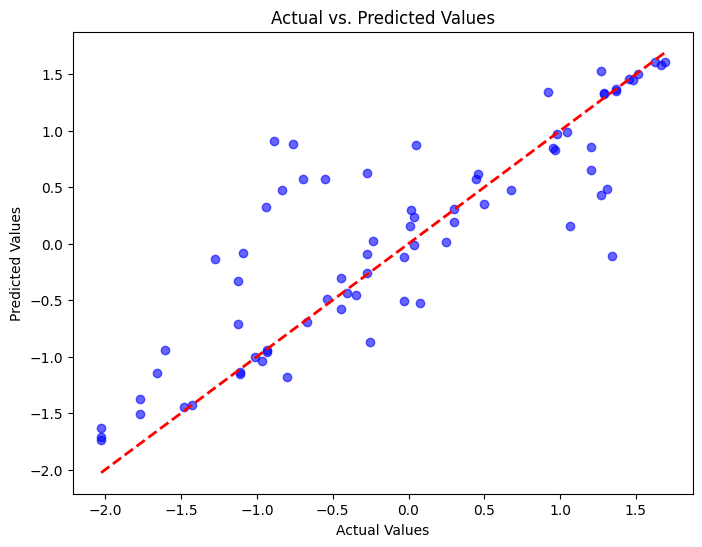

In [108]:
# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display first few rows
print(comparison_df.head())

# Plot Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')  # Scatter plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [107]:
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 0.37
R² Score: 0.71


In [109]:
import joblib

# Save the trained model
joblib.dump(model, "random_forest_model.pkl")
print("Model saved successfully!")

# Load the saved model
loaded_model = joblib.load("random_forest_model.pkl")

# Verify by making a prediction
sample_prediction = loaded_model.predict(X_test[:5])
print("Sample Predictions:", sample_prediction)

Model saved successfully!
Sample Predictions: [ 0.31063175  0.23597725 -0.43537263  0.57114234  0.87217721]
